In [1]:
# Step 1: Import Libraries
# Career Cluster Prediction - Model 2: Decision Tree & Random Forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 2: Load dataset
df = pd.read_csv('E:\College\SEM_5\CPRS_AI\server\ml_models\datasets\DS2_Career_Cluster_Prediction.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nCareer Clusters:")
print(df['careerCluster'].value_counts())
print("\nDataset Info:")
print(df.info())

Dataset Shape: (199, 17)

First 5 rows:
                     userId          name                    email  age  \
0  68d6252f17fb7e6b9b56b1f4  Arjun Sharma   arjun.sharma@gmail.com   22   
1  7a5c8e9f2b1d4c6a8e0f3b5d   Priya Patel    priya.patel@yahoo.com   24   
2  5f2a9c7e4b8d1a3c6f9e2b4a   Rahul Kumar  rahul.kumar@hotmail.com   23   
3  8b4d6f1a9c3e7b5d8f2a4c6e   Sneha Singh    sneha.singh@gmail.com   25   
4  2c9e5a7f3b6d8c1a5f9e2b4d    Amit Gupta   amit.gupta@outlook.com   21   

   gender educationLevel  phoneNumber       city        state  \
0    Male      bachelors   9876543210     Mumbai  Maharashtra   
1  Female           10th   9123456780  Ahmedabad      Gujarat   
2    Male        masters   9234567891      Delhi        Delhi   
3  Female           11th   9345678902  Bangalore    Karnataka   
4    Male            phd   9456789013       Pune  Maharashtra   

           interests personalityType  personalityScore  cognitiveScore  \
0        Programming       Introvert        

In [3]:
# Step 3: Data Perprocessing
# Remove unnecessary columns for training
columns_to_drop = ['userId', 'name', 'email', 'phoneNumber', 'city', 'state']
df_model = df.drop(columns=columns_to_drop)

print("Columns after removing unnecessary features:")
print(df_model.columns.tolist())
print("\nDataset shape after preprocessing:", df_model.shape)

# Check unique values in categorical columns
categorical_cols = ['gender', 'educationLevel', 'interests', 'personalityType']
for col in categorical_cols:
    print(f"\n{col} unique values:", df_model[col].unique())

Columns after removing unnecessary features:
['age', 'gender', 'educationLevel', 'interests', 'personalityType', 'personalityScore', 'cognitiveScore', 'skillsScore', 'situationalScore', 'valuesScore', 'careerCluster']

Dataset shape after preprocessing: (199, 11)

gender unique values: ['Male' 'Female']

educationLevel unique values: ['bachelors' '10th' 'masters' '11th' 'phd' '12th']

interests unique values: ['Programming' 'Business' 'Medicine' 'Mechanical Design'
 'Digital Marketing' 'Banking' 'Graphic Design' 'Journalism'
 'Sales Strategy' 'Cybersecurity' 'Laboratory Work' 'Teaching'
 'Customer Service' 'Painting' 'Legal Research' 'Business Strategy'
 'Data Science' 'Management' 'Surgery' 'Civil Engineering'
 'Content Marketing' 'Investment Banking' 'UI/UX Design' 'Broadcasting'
 'Lead Generation' 'Mobile Apps' 'Scientific Research'
 'Curriculum Development' 'Event Planning' 'Creative Writing' 'Advocacy'
 'Process Improvement' 'Machine Learning' 'Leadership' 'Pediatrics'
 'Aerospace

In [4]:
# Step 4: Encode Categorical columns
# Initialize label encoders
label_encoders = {}

# Encode categorical variables
categorical_columns = ['gender', 'educationLevel', 'interests', 'personalityType']

for column in categorical_columns:
    le = LabelEncoder()
    df_model[column] = le.fit_transform(df_model[column])
    label_encoders[column] = le
    print(f"Encoded {column}: {df_model[column].unique()}")

print("\nDataset after encoding:")
print(df_model.head())

Encoded gender: [1 0]
Encoded educationLevel: [3 0 4 1 5 2]
Encoded interests: [132  19 104 103  51  11  76  91 146  46  92 168  45 118  95  21  48 100
 161  27  36  89 178  17  93 107 148  44  63  42   2 129  99  94 120   3
 145 127  67  69  10  49   0  55  79 124  40 101 150 169 113 158  15  54
  86 179  29 170  68  32 176 108  34 156   8 115  24  83 134  70 131  53
 173  31 162 177 141 180  43  26 143  59  58 122  84 155   6 138  22 111
  96   1  73 149  66  80  12 142 123 106 121 109  98 126 110 164 154 147
 135 174  61  52 137 160 139 102  23  18  16 112 130  75 136  78 181  47
  88  20  13  87 114   5  37  90  64  35  28 152  85 171  39 105 165  77
  74 117 140  56  72 166  81 157 119 144   9  60  65 153  62  25   7 116
  33  38  50 151  57  71  14 163  30 159 175  82  97 128 133 125 172   4
 167  41]
Encoded personalityType: [2 1 0]

Dataset after encoding:
   age  gender  educationLevel  interests  personalityType  personalityScore  \
0   22       1               3        132  

In [5]:
# Step 5: Prepare Features and Target
# Separate features and target variable
x = df_model.drop('careerCluster', axis=1)
y = df_model['careerCluster']

print("Features (x) shape:", x.shape)
print("Target (y) shape:", y.shape)

print("\nFeature columns:")
print(x.columns.tolist())

print("\nTarget variable unique values:")
print(y.unique())
print("\nTarget distribution:")
print(y.value_counts())

Features (x) shape: (199, 10)
Target (y) shape: (199,)

Feature columns:
['age', 'gender', 'educationLevel', 'interests', 'personalityType', 'personalityScore', 'cognitiveScore', 'skillsScore', 'situationalScore', 'valuesScore']

Target variable unique values:
['STEM' 'Business' 'Healthcare' 'Engineering' 'Marketing' 'Finance'
 'Design' 'Media' 'Sales' 'IT' 'Research' 'Education' 'Service' 'Arts'
 'Law' 'Consulting']

Target distribution:
careerCluster
STEM           13
Business       13
Healthcare     13
Engineering    13
Marketing      13
Finance        13
Design         13
Media          12
Sales          12
IT             12
Research       12
Education      12
Service        12
Arts           12
Law            12
Consulting     12
Name: count, dtype: int64


In [6]:
# Step 6: Train-Test split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

print("\nTraining set target distribution:")
print(y_train.value_counts())

Training set shape: (159, 10)
Testing set shape: (40, 10)
Training target shape: (159,)
Testing target shape: (40,)

Training set target distribution:
careerCluster
Design         12
Media          11
Sales          11
IT             11
Business       11
Research       11
Engineering    10
Finance        10
Marketing      10
Healthcare     10
Education      10
Arts            9
Consulting      9
Law             8
Service         8
STEM            8
Name: count, dtype: int64


In [7]:
# Step 7: Decision Tree Model Training
# Create and train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_leaf=6,
    random_state=42
)

# Train the model
dt_classifier.fit(x_train, y_train)

print("Decision Tree model trained successfully!")
print("Model parameters:", dt_classifier.get_params())

Decision Tree model trained successfully!
Model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [8]:
# Step 8: Decision Tree Predictions and Evaluation
# Make predictions
y_pred_dt = dt_classifier.predict(x_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

# Classification report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.325

Decision Tree Classification Report:
              precision    recall  f1-score   support

        Arts       1.00      1.00      1.00         3
    Business       0.00      0.00      0.00         2
  Consulting       0.00      0.00      0.00         3
      Design       1.00      1.00      1.00         1
   Education       0.00      0.00      0.00         2
 Engineering       1.00      0.67      0.80         3
     Finance       1.00      1.00      1.00         3
  Healthcare       0.00      0.00      0.00         3
          IT       0.17      1.00      0.29         1
         Law       0.00      0.00      0.00         4
   Marketing       0.00      0.00      0.00         3
       Media       0.50      1.00      0.67         1
    Research       1.00      1.00      1.00         1
        STEM       0.00      0.00      0.00         5
       Sales       0.05      1.00      0.09         1
     Service       0.00      0.00      0.00         4

    accuracy

In [9]:
# Step 9: Random Forest Model Training
# Create and train Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=4,
    min_samples_leaf=6,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_classifier.fit(x_train, y_train)

print("Random Forest model trained successfully!")
print("Model parameters:", rf_classifier.get_params())


Random Forest model trained successfully!
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [10]:
# Step 10: Random Forest Predictions and Evaluation
# Make predictions
y_pred_rf = rf_classifier.predict(x_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

# Classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.875

Random Forest Classification Report:
              precision    recall  f1-score   support

        Arts       1.00      1.00      1.00         3
    Business       1.00      0.50      0.67         2
  Consulting       1.00      1.00      1.00         3
      Design       1.00      1.00      1.00         1
   Education       1.00      1.00      1.00         2
 Engineering       1.00      0.67      0.80         3
     Finance       1.00      1.00      1.00         3
  Healthcare       1.00      1.00      1.00         3
          IT       1.00      1.00      1.00         1
         Law       1.00      1.00      1.00         4
   Marketing       0.75      1.00      0.86         3
       Media       0.50      1.00      0.67         1
    Research       1.00      1.00      1.00         1
        STEM       1.00      1.00      1.00         5
       Sales       0.25      1.00      0.40         1
     Service       1.00      0.25      0.40         4

    accuracy

Feature Importance (Random Forest):
            feature  importance
9       valuesScore    0.262251
6    cognitiveScore    0.214546
8  situationalScore    0.160522
7       skillsScore    0.152076
5  personalityScore    0.107310
1            gender    0.045523
2    educationLevel    0.036999
3         interests    0.011692
0               age    0.008118
4   personalityType    0.000963


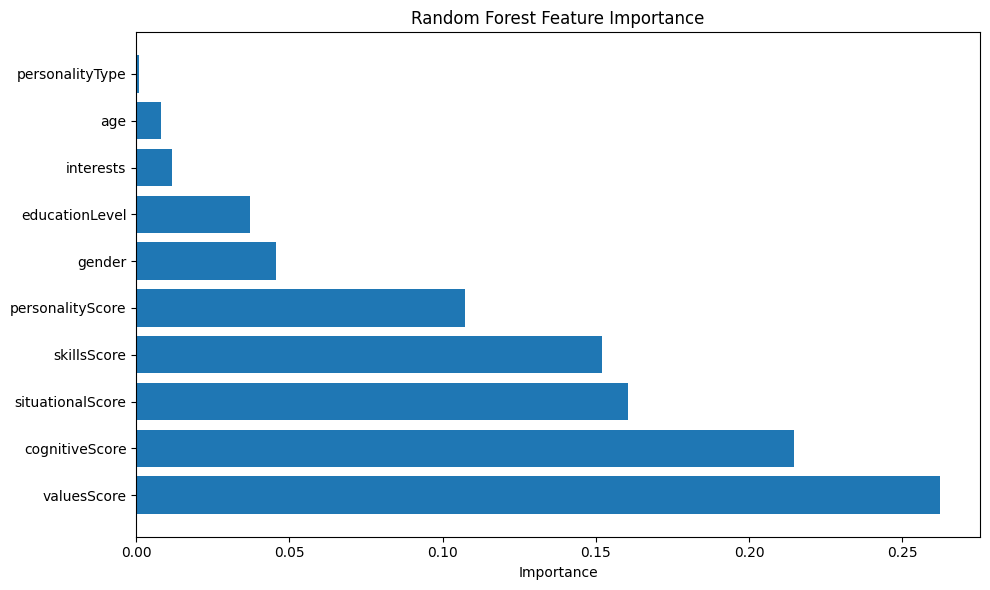

In [11]:
# Step 11: Feature Importance Analysis
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': x.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

In [12]:
# Step 12: Model Comparison
# Compare both models
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [dt_accuracy, rf_accuracy]
})

print("Model Comparison:")
print(model_comparison)

# Select best model
best_model_name = model_comparison.loc[model_comparison['Accuracy'].idxmax(), 'Model']
best_accuracy = model_comparison['Accuracy'].max()

print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Save the best model
if best_model_name == 'Random Forest':
    best_model = rf_classifier
else:
    best_model = dt_classifier

Model Comparison:
           Model  Accuracy
0  Decision Tree     0.325
1  Random Forest     0.875

Best Model: Random Forest
Best Accuracy: 0.8750


In [13]:
# Step 13: Save Models for Model 3 Integration
# Save both models and label encoders for Model 3
joblib.dump(dt_classifier, 'decision_tree_model.pkl')
joblib.dump(rf_classifier, 'random_forest_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(best_model, 'best_model_2.pkl')

# Save feature names
feature_names = x.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

print("Models saved successfully!")
print("Files created:")
print("- decision_tree_model.pkl")
print("- random_forest_model.pkl") 
print("- best_model_2.pkl")
print("- label_encoders.pkl")
print("- feature_names.pkl")

print(f"\nModel 2 training completed!")
print(f"Best performing model: {best_model_name}")
print(f"Ready for Model 3 integration!")

Models saved successfully!
Files created:
- decision_tree_model.pkl
- random_forest_model.pkl
- best_model_2.pkl
- label_encoders.pkl
- feature_names.pkl

Model 2 training completed!
Best performing model: Random Forest
Ready for Model 3 integration!


In [14]:
# Step 14: Sample Prediction Function
# Function to make predictions on new data
def predict_career_cluster(age, gender, education, interests, personality, 
                          personality_score, cognitive_score, skills_score, 
                          situational_score, values_score):
    """
    Predict career cluster for new user data
    """
    # Create input dataframe
    input_data = pd.DataFrame({
        'age': [age],
        'gender': [gender],
        'educationLevel': [education], 
        'interests': [interests],
        'personalityType': [personality],
        'personalityScore': [personality_score],
        'cognitiveScore': [cognitive_score],
        'skillsScore': [skills_score],
        'situationalScore': [situational_score],
        'valuesScore': [values_score]
    })
    
    # Encode categorical variables
    for column in categorical_columns:
        if column in input_data.columns:
            input_data[column] = label_encoders[column].transform(input_data[column])
    
    # Make prediction
    prediction = best_model.predict(input_data)
    probability = best_model.predict_proba(input_data)
    
    return prediction[0], probability[0]

# Test the function
print("Testing prediction function:")
sample_prediction, sample_probability = predict_career_cluster(
    age=25, 
    gender='Male', 
    education='bachelors', 
    interests='Programming',
    personality='Introvert', 
    personality_score=80, 
    cognitive_score=85,
    skills_score=90, 
    situational_score=75, 
    values_score=70
)

print(f"Predicted Career Cluster: {sample_prediction}")

Testing prediction function:
Predicted Career Cluster: IT
